In [16]:
from langgraph.graph import StateGraph, START, END
from typing import Any, Dict, List, TypedDict, Literal

In [17]:
class QuadraticEquationWorkflowState(TypedDict):
    """Input data for solving a quadratic equation."""
    a: int
    b: int
    c: int

    
    equation: str
    roots: List[float]
    discriminant: float

In [18]:
def ShowEquation(state : QuadraticEquationWorkflowState):
    """Display the quadratic equation."""
    a = state['a']
    b = state['b']
    c = state['c']
    equation = f"{a}x^2 + {b}x + {c} = 0"
    return {
        'equation': equation
    }


def CalculateDiscriminant(state : QuadraticEquationWorkflowState):
    """Calculate the discriminant of the quadratic equation."""
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    return {
        'discriminant': discriminant
    }

def RealRoots(state : QuadraticEquationWorkflowState):
    """Calculate the real roots of the quadratic equation."""
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = state['discriminant']
    
    
    sqrt_discriminant = discriminant**0.5
    root1 = (-b + sqrt_discriminant) / (2 * a)
    root2 = (-b - sqrt_discriminant) / (2 * a)
    
    return {'roots': [root1, root2]}

def ImaginaryRoots(state : QuadraticEquationWorkflowState):
    """Calculate the imaginary roots of the quadratic equation."""
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = state['discriminant']
    
    sqrt_discriminant = (-discriminant)**0.5
    real_part = -b / (2 * a)
    imaginary_part = sqrt_discriminant / (2 * a)
    
    root1 = complex(real_part, imaginary_part)
    root2 = complex(real_part, -imaginary_part)
    
    return {'roots': [root1, root2]}

def RepeatedRoots(state : QuadraticEquationWorkflowState):
    """Calculate the repeated root of the quadratic equation."""
    a = state['a']
    b = state['b']
    c = state['c']
    
    root = -b / (2 * a)
    
    return {'roots': [root, root]}

def Router (state : QuadraticEquationWorkflowState) -> Literal["Real_Roots", "Repeated_Roots", "Imaginary_Roots"]:
    """Route to the appropriate function based on the discriminant."""
    discriminant = state['discriminant']
    
    if discriminant > 0:
        return "Real_Roots"
    elif discriminant == 0:
        return "Repeated_Roots"
    else:
        return "Imaginary_Roots"

In [19]:
graph = StateGraph(QuadraticEquationWorkflowState)

# Define the Nodes
graph.add_node("Show_Equation", ShowEquation)
graph.add_node("Calculate_Discriminant", CalculateDiscriminant)
graph.add_node("Repeated_Roots", RepeatedRoots)
graph.add_node("Real_Roots", RealRoots)
graph.add_node("Imaginary_Roots", ImaginaryRoots)

# Define the Edges
graph.add_edge(START, "Show_Equation")
graph.add_edge("Show_Equation", "Calculate_Discriminant")
graph.add_conditional_edges("Calculate_Discriminant", Router)
graph.add_edge("Real_Roots", END)
graph.add_edge("Repeated_Roots", END)
graph.add_edge("Imaginary_Roots", END)

# Initialize the Graph
workflow = graph.compile()

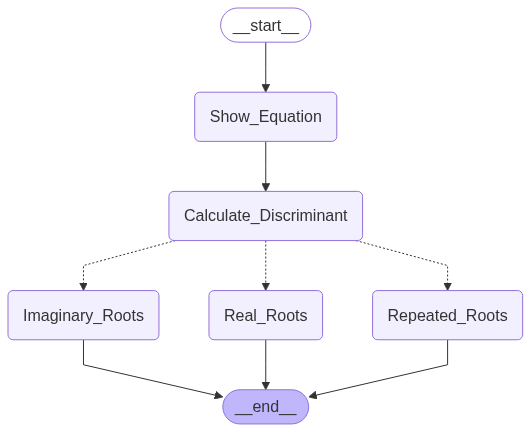

In [20]:
from IPython.display import display, Markdown, Image
Image(workflow.get_graph().draw_mermaid_png())
# display(Markdown("### BMI Calculator Workflow"))

In [24]:
# Execute the Workflow
input_data = {
    "a": 4,
    "b": 2,
    "c": 4
    }

result = workflow.invoke(input_data)
display(Markdown(f"### Quadratic Equation: {result['equation']}"))
display(Markdown(f"### Roots: {result['roots']}"))
display(Markdown(f"### Discriminant: {result['discriminant']}"))


### Quadratic Equation: 4x^2 + 2x + 4 = 0

### Roots: [(-0.25+0.9682458365518543j), (-0.25-0.9682458365518543j)]

### Discriminant: -60